# Python Data Science Project : Exploratory Data Analysis and Price Prediction of Automobile Sales Data

## Introduction

This project aims to analyze and explore a dataset related to automobile sales, using Python as the primary tool for data manipulation and visualization. The dataset provides a comprehensive set of features such as vehicle make, engine size, body style, fuel type, and price, among others, allowing for insightful exploration and deeper understanding of the factors influencing automobile prices and sales trends.

The project involves several steps of exploratory data analysis (EDA) to uncover patterns and relationships within the data, using various visualization techniques such as count plots, box plots, heatmaps, and pie charts. These techniques help highlight key trends, distributions, and correlations across different variables in the dataset. Furthermore, the analysis incorporates predictive modeling through linear regression to predict vehicle prices based on a selected set of variables.

The primary goal of this project is to showcase my data science skills, particularly in handling real-world data, performing data cleaning, generating visual insights, and applying predictive modeling techniques. In this data science project, I have focused on mastering foundational techniques and implementing them effectively in a Jupyter notebook environment.

## Objective

The objective of this project is to conduct a thorough exploratory data analysis (EDA) of automobile sales data and use linear regression modeling to predict vehicle prices based on key features. Specifically, this project aims to achieve the following goals:

* Perform data cleaning and preprocessing to prepare the dataset for analysis.
* Use count plots to visualize the frequency distribution of categorical variables.
* Create box plots to examine the distribution of vehicle prices across different categories.
* Generate heatmaps to analyze correlations between numerical variables in the dataset.
* Visualize the distribution of specific variables using pie charts.
* Develop a linear regression model to predict vehicle prices based on a selected set of four important features.

Let's start the project by importing important Libraries.

In [2]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
path = r"C:\Users\11732\Desktop\Data science\Practice Data Science\automobileEDA.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.shape

(201, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [7]:
pd.isnull(df).sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [8]:
df['price'] = df['price'].astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [10]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [11]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


### Exploratory Data Analyses

First we will see Model wise sale of Cars by making simple Countplot

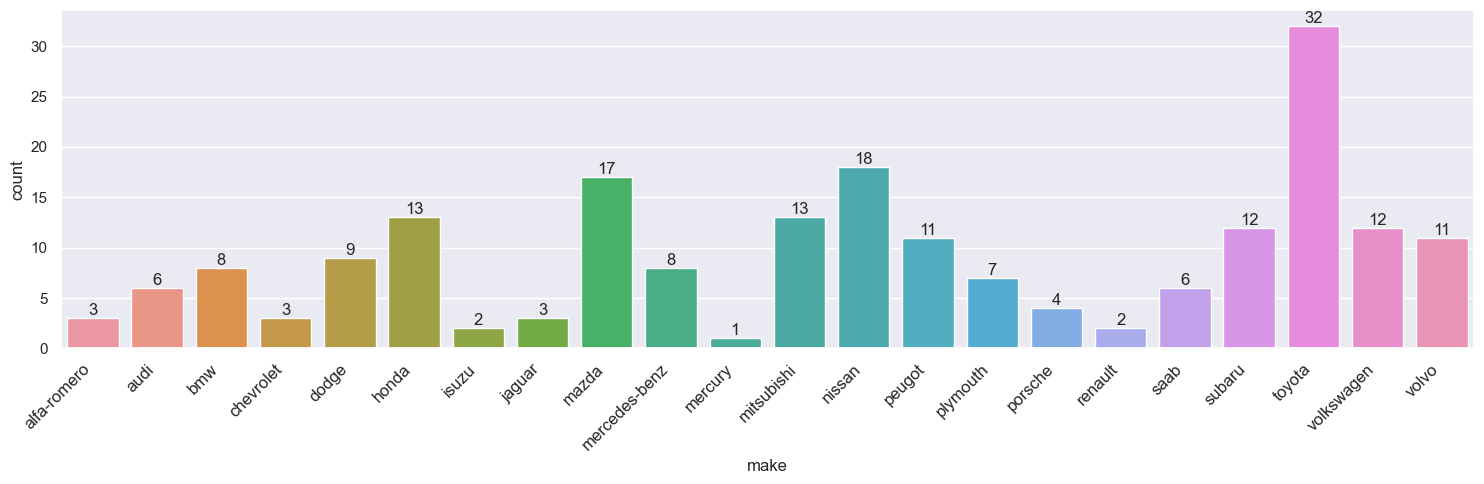

In [23]:
ax = sns.countplot(x = 'make',data = df)
sns.set(rc={'figure.figsize':(15,5)})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits into the figure area
plt.show()  # Display the plot


From the above graph, we can analyse that the Highest selling moded is Toyota followed by Nissan and Mazda

With the increasing Fuel Prices, People might be more concerned about the low Mileage of cars they intend to buy. For this, We will visualize the Sale of Car with respect to their Mileage.

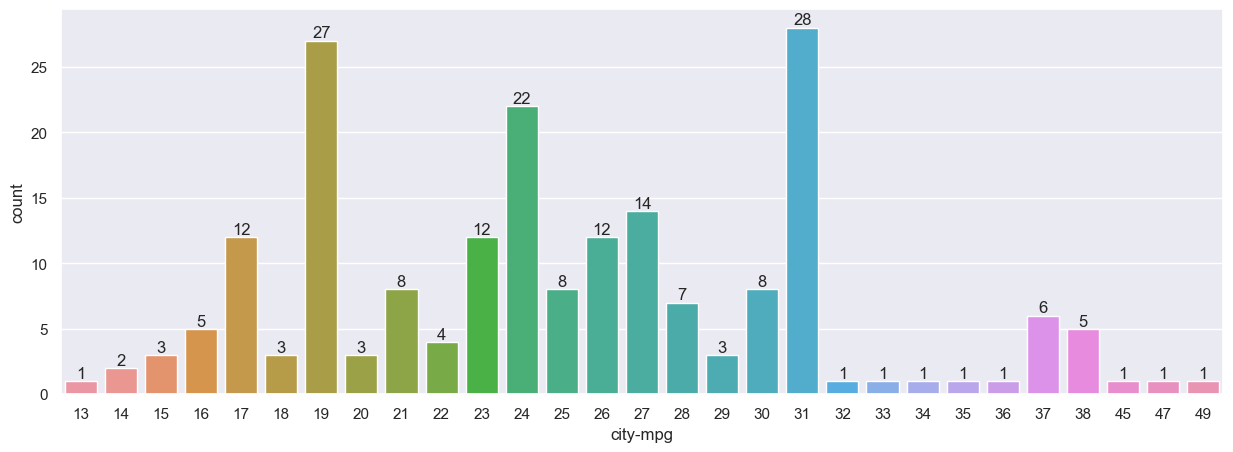

In [13]:
ax = sns.countplot(x = 'city-mpg',data = df)


for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()  # Display the plot

However, from the above viualization, it is clear the people are not much concerned about the Mileage while purchasing the vehicles.

Now, we will make Pie chart to analyse the Model Wise sale percentage and Count of Body Style of thar Partcular "Make".

In [27]:
import plotly.graph_objs as go


# Step 1: Aggregate the data for 'Make' and 'Body-style'
make_body_counts = df.groupby(['make', 'body-style']).size().reset_index(name='count')

# Step 2: Create aggregated data for 'Make'
make_counts = df['make'].value_counts().reset_index()
make_counts.columns = ['make', 'count']

# Step 3: Create hover text that displays the body-style distribution for each 'Make'
hover_texts = []
for make in make_counts['make']:
    body_style_data = make_body_counts[make_body_counts['make'] == make]
    hover_text = f"<b>{make}</b><br>"
    hover_text += '<br>'.join([f"{row['body-style']}: {row['count']}" for _, row in body_style_data.iterrows()])
    hover_texts.append(hover_text)

# Step 4: Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=make_counts['make'],
    values=make_counts['count'],
    hoverinfo='label+value+percent',  # Display the label, value, and percentage on hover
    textinfo='label+percent',
    hovertext=hover_texts,  # Custom hover text showing body-style distribution
    hovertemplate='%{hovertext}<extra></extra>'  # Use hovertemplate to enforce custom hovertext
)])

# Set up the layout
fig.update_layout(
    title_text="Interactive Pie Chart of 'Make' with Body-Style Information on Hover",
)

# Show the figure
fig.show()

#### Note: Pie Chart will not visualized in PDF version. Pie-Chart with Hovering effect only be visualized on Jupyter Notebook, Pycharm or VS code.

Below, we will analyse the Body style wise sale of Cars.

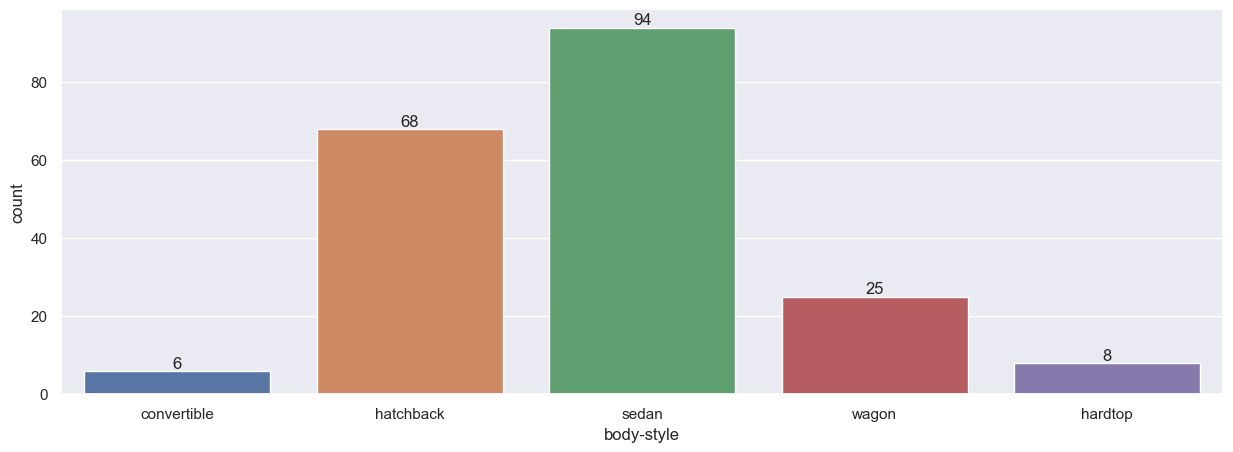

In [15]:
ax = sns.countplot(x = 'body-style',data = df)


for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()  # Display the plot

From the above graph, most selling type of car is "Sedan".

Now, we will analyse the sale of cars by their "Number of Doors" and "Drive Wheels".

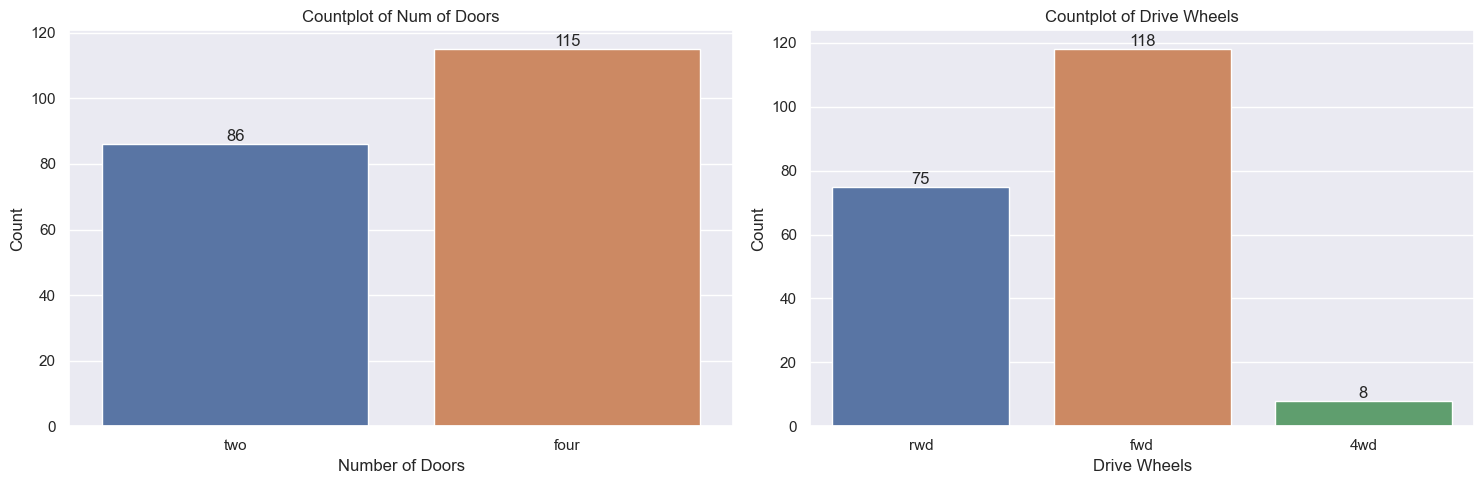

In [16]:
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='num-of-doors', data=df)
plt.title('Countplot of Num of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Count')

# Annotate each bar with the count above
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

# Countplot for drive-wheels
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='drive-wheels', data=df)
plt.title('Countplot of Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Count')

# Annotate each bar with the count above
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

# Display the plots
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

### Explanation of the Boxplot:

A boxplot is a graphical representation that shows the distribution of a dataset based on five summary statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. In the context of this analysis, the boxplot shows the distribution of price for each make (car manufacturer).

### Key Components of a Boxplot:

* Boxes: The box represents the interquartile range (IQR), which contains the middle 50% of the data. The bottom of the box is the first quartile (Q1), and the top of the box is the third quartile (Q3). The length of the box indicates the spread of the central half of the data.
* Median (Q2): The horizontal line inside the box represents the median (Q2), which is the middle value of the data.
* Whiskers: The lines (whiskers) extending from the box represent the data points that fall within 1.5 times the IQR above the third quartile or below the first quartile. Whiskers indicate the range of the bulk of the data.
* Outliers: Any points outside the whiskers are considered outliers and are plotted as individual points. These represent values that are significantly higher or lower than the rest of the data.

Here we are writing code to make box plot of Car prices by Make

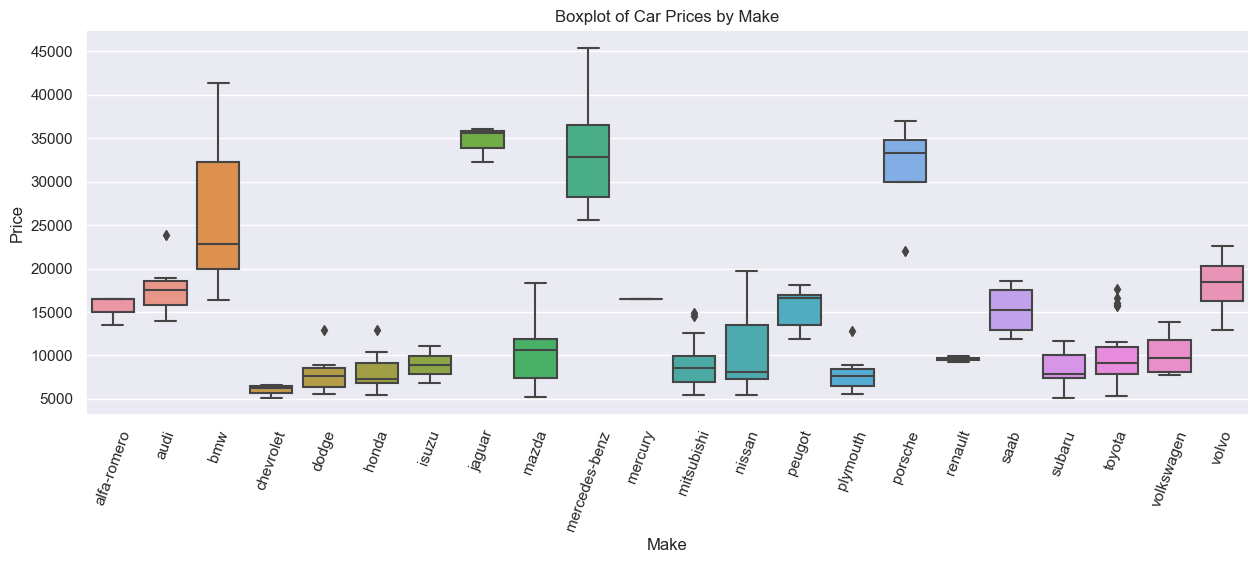

In [18]:
sns.boxplot(x='make', y='price', data=df)

# Improving the appearance
plt.xticks(rotation=70)  # Rotate the x-axis labels for better readability
plt.title('Boxplot of Car Prices by Make')  # Adding a title
plt.ylabel('Price')  # Labeling the y-axis
plt.xlabel('Make')  # Labeling the x-axis

# Display the plot
plt.show()

### Analysis of the Boxplot (Make vs. Price):

The boxplot visualizes the distribution of car prices across different car manufacturers, helping to highlight the price ranges and identify any patterns or outliers for specific brands.

Key Insights:
1. Variation in Prices Among Car Manufacturers:

* The width and position of the boxes vary considerably across different car manufacturers. Some makes, such as BMW, Mercedes-Benz, and Jaguar, tend to have higher price ranges, indicating that these brands typically produce more expensive vehicles.
* On the other hand, brands like Honda, Toyota, and Mazda tend to have lower price ranges, suggesting that these manufacturers produce more affordable cars.

2. Price Distributions:

* BMW, Mercedes-Benz, and Jaguar have wide interquartile ranges, indicating that the prices of their vehicles vary significantly within the brand, reflecting different models and options that cater to various price segments within the luxury market.
* Brands like Honda and Toyota have narrower boxes, indicating that their prices are more consistent and clustered within a smaller range, often reflecting a focus on affordable, mass-market vehicles.

3. Outliers:

* Some manufacturers, such as BMW, Jaguar, and Mercedes-Benz, have notable outliers on the higher end of the price range. These outliers represent particularly expensive models that are significantly higher-priced compared to the rest of the cars from the same manufacturer, possibly luxury or high-performance vehicles.
* There are also lower-priced outliers for certain makes, which may represent budget or entry-level models.

4. Median Prices:

* The position of the median line within each box gives an indication of the central tendency of prices for each manufacturer. For example, Mercedes-Benz and BMW have higher medians compared to brands like Toyota or Honda, highlighting their general focus on higher-priced vehicles.
* In some manufacturers, such as Audi, the median is closer to the lower quartile, indicating that the majority of their vehicles are priced on the lower end of their price range.

5. Luxury vs. Economy Brands:

* From the boxplot, it is easy to distinguish between luxury and economy brands based on price. Luxury brands like Jaguar, BMW, and Mercedes-Benz dominate the higher price range, while economy brands like Honda, Mazda, and Toyota are clustered in the lower price ranges.

Conclusion:
This boxplot provides an intuitive overview of how car prices are distributed across different manufacturers. It clearly shows the distinctions between luxury car brands, which tend to have wider price ranges and higher medians, and economy car brands, which tend to have narrower ranges and lower medians. The presence of outliers highlights certain models that significantly deviate from the typical pricing for a brand, indicating premium offerings or specialized vehicles.

This type of analysis is crucial for understanding the pricing strategies and market positioning of different car manufacturers, which can further inform predictive modeling, pricing analysis, or consumer behavior studies.

### Heatmap Explanation:

In heatmap, we are visualizing the correlation matrix of the dataset. A correlation matrix is a table that shows the correlation coefficients between different variables in the dataset. Each cell in the heatmap represents the correlation between two variables.

#### What is Correlation?

* Correlation measures the strength and direction of a linear relationship between two variables. It ranges from -1 to 1.
* A correlation coefficient of 1 indicates a perfect positive relationship.
* A correlation coefficient of -1 indicates a perfect negative relationship.
* A correlation coefficient of 0 indicates no linear relationship.

Now we will enter the code to make Heatmap:

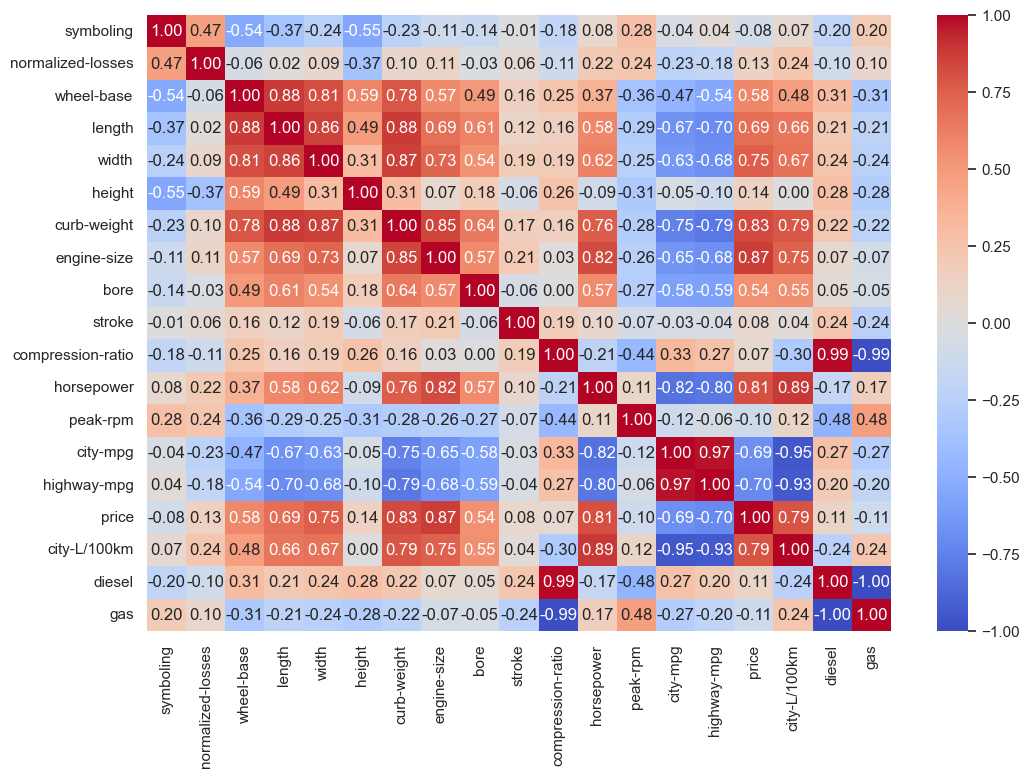

In [19]:
numerical_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show the plot
plt.show()

### Correlation Between Price and Other Variables:

In this analysis, the price of automobiles is a critical variable, as it often serves as the target variable in predictive modeling tasks such as regression. Understanding how price correlates with other features in the dataset can provide valuable insights into what factors most influence the cost of a vehicle.

### Key Observations from the Heatmap:

1. Positive Correlations with Price:

* Engine Size (engine-size): There is typically a strong positive correlation between engine-size and price. This suggests that cars with larger engines tend to be more expensive. Larger engines usually provide more power, which often corresponds to higher-end, more costly vehicles.
* Horsepower (horsepower): Similar to engine size, horsepower is another variable that often shows a strong positive correlation with price. Vehicles with higher horsepower usually offer better performance, making them more desirable and thus more expensive.
* Curb Weight (curb-weight): This feature measures the weight of the car without occupants or baggage. Heavier cars often have more features, better build quality, and larger engines, which can increase their price. Therefore, a strong positive correlation between curb-weight and price is expected.
* Length (length) and Width (width): These dimensions of a car are also positively correlated with price. Larger vehicles, such as luxury sedans or SUVs, tend to cost more due to their size, comfort, and often additional features.

2. Negative Correlations with Price:

* Highway MPG (highway-mpg): There is usually a strong negative correlation between highway-mpg and price. This suggests that cars with higher fuel efficiency on the highway tend to be less expensive. More expensive cars often have larger engines that, while powerful, are less fuel-efficient.
* City MPG (city-mpg): Similarly, city-mpg (fuel efficiency in city driving conditions) may also show a negative correlation with price. Vehicles designed for better fuel efficiency in the city tend to be less powerful and thus less expensive.

3. Weak or No Significant Correlation:

* Peak-RPM: The correlation between price and peak-rpm often tends to be weak or close to zero. This suggests that the engine's revolutions per minute at its peak performance level do not have a strong or direct influence on the price of the vehicle.
* Number of Doors (num-of-doors): This variable often shows little to no correlation with price. The number of doors in a vehicle (e.g., 2-door vs. 4-door) may not significantly impact the price compared to other factors like engine size, performance, or brand.
* Fuel Type (fuel-type) and Aspiration (aspiration): These categorical variables may show weaker correlations with price. While they do influence the vehicle's characteristics, their direct impact on price might not be as strong as engine size or performance metrics.

Below are the code to make the Regression plot of Price against four variables. These variables are  Engine Size, Curb Weight, Highway MPG and Peak-RPM.

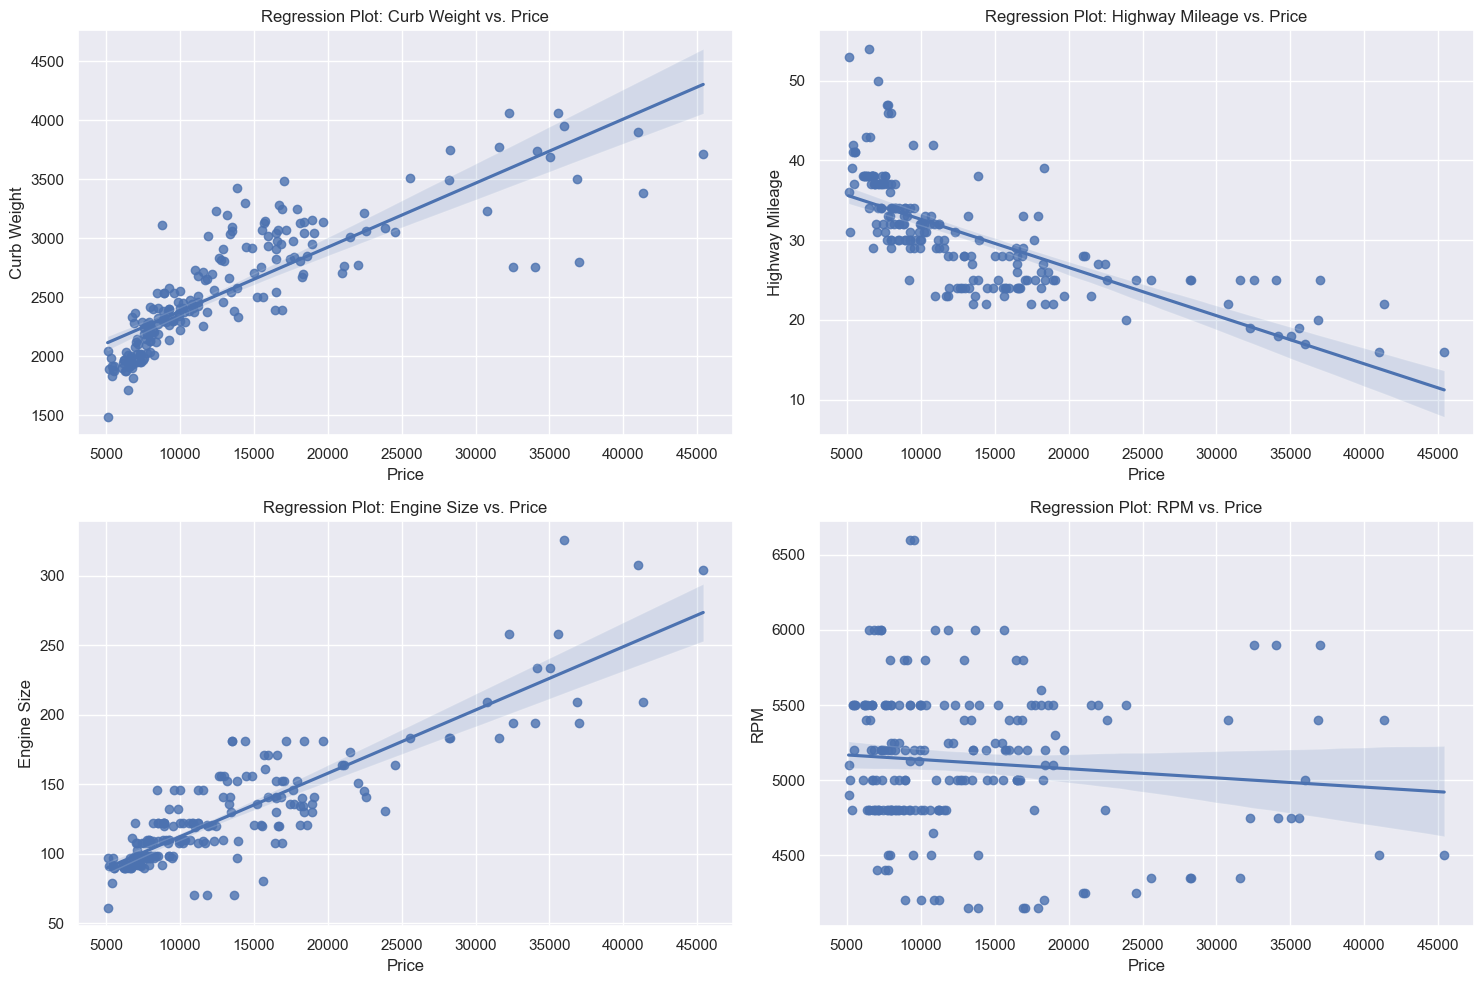

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# First Plot
sns.regplot(x='price', y='curb-weight', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Regression Plot: Curb Weight vs. Price')  # Adding a title
axes[0, 0].set_ylabel('Curb Weight')  # Labeling the y-axis
axes[0, 0].set_xlabel('Price')  # Labeling the x-axis

# Second Plot
sns.regplot(x='price', y='highway-mpg', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Regression Plot: Highway Mileage vs. Price')  # Adding a title
axes[0, 1].set_ylabel('Highway Mileage')  # Labeling the y-axis
axes[0, 1].set_xlabel('Price')  # Labeling the x-axis

# Third Plot
sns.regplot(x='price', y='engine-size', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: Engine Size vs. Price')  # Adding a title
axes[1, 0].set_ylabel('Engine Size')  # Labeling the y-axis
axes[1, 0].set_xlabel('Price')  # Labeling the x-axis

# Fourth Plot
sns.regplot(x='price', y='peak-rpm', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Regression Plot: RPM vs. Price')  # Adding a title
axes[1, 1].set_ylabel('RPM')  # Labeling the y-axis
axes[1, 1].set_xlabel('Price')  # Labeling the x-axis

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

To predict the price of a car based on the four variables: engine-size, curb-weight, highway-mpg, and peak-rpm, we can use a linear regression model. This is a common approach in predictive modeling, especially when we want to understand the relationship between a target variable (price) and several independent variables.

Mean Squared Error: 27778248.947533764
R^2 Score: 0.7729547886909968


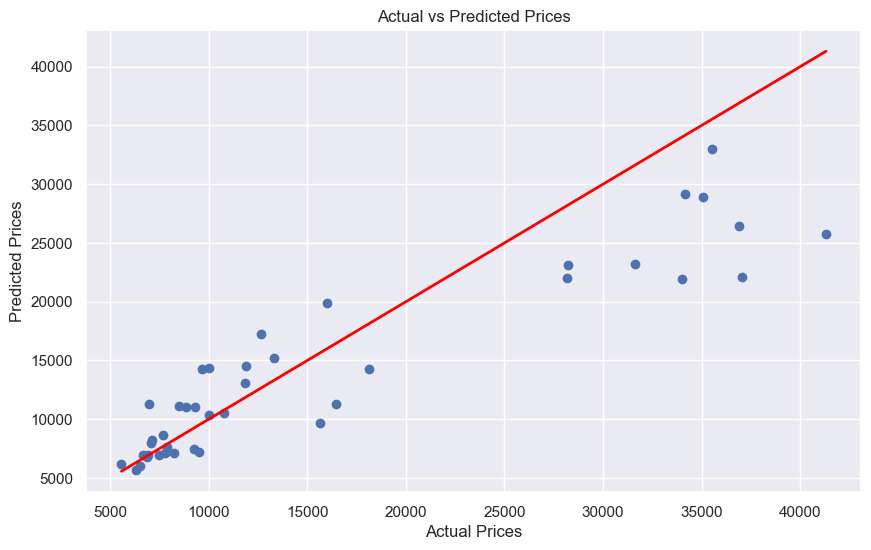

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Select the relevant columns
features = ['curb-weight', 'engine-size', 'highway-mpg', 'peak-rpm']
X = df[features]
y = df['price']

# Handle missing values if any
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


### Explanation of Results:

* Mean Squared Error (MSE): This metric indicates how far off the predicted prices are from the actual prices, on average. Lower MSE values are better.
* R-squared (R²): This value represents the proportion of variance in the dependent variable (price) that is predictable from the independent variables. An R² value closer to 1 indicates a better fit.

To predict the price of a car using the trained model and imaginary values for the four variables (engine-size, curb-weight, highway-mpg, and peak-rpm), we can follow the steps below.

Let's assume we have imaginary values for the four variables. For example:

Engine Size: 150 cubic inches
Curb Weight: 3000 pounds
Highway MPG: 30 miles per gallon
Peak RPM: 5000 revolutions per minute
We can use these values to predict the price of the car using the linear regression model we already trained.

In [22]:
# Predicting the price of a new car
new_car_features = { 'curb-weight': 3000,'engine-size': 150,'highway-mpg': 30,'peak-rpm': 5000 }

# Convert the features into a DataFrame with the same column names as the training data
new_car = pd.DataFrame([new_car_features])

# Predict the price
predicted_price = model.predict(new_car)
print(f"Predicted Price:${predicted_price[0]:.2f}")

Predicted Price:$17057.08


## Utilization of Price Prediction
### 1. Valuation for Buyers and Sellers:

Buyers: Potential car buyers can use the predicted price to assess whether a car is fairly priced based on its specifications.
Sellers: Car sellers can use the model to set a competitive price for their vehicle based on its attributes.

### 2. Inventory Management:

Dealerships: Car dealerships can use price predictions to manage inventory, determine pricing strategies, and identify which cars are over- or underpriced.
Insurance Companies:

Policy Pricing: Insurance companies can use predicted car prices to help set insurance premiums, as the value of the car is a critical factor in determining the cost of insurance.
Loan Providers:

Loan Approval: Financial institutions providing car loans can use predicted prices to assess the value of collateral and determine loan amounts.
Market Analysis:

Trend Analysis: Analysts can use aggregated price predictions to identify trends in the automotive market, such as the impact of specific features on car prices.
Personal Financial Planning:

Budgeting: Individuals planning to buy a car can use the model to estimate the cost and better budget for their purchase.

## Conclusion and Acknowledgments

Thank you for taking the time to read through my first data science project on exploratory data analysis (EDA) of automobile sales data. I truly appreciate your interest and support as I begin my journey in data science. This project has been a valuable learning experience for me, and I hope that the insights and visualizations presented here have been insightful and engaging.

As this is my first attempt at a full data analysis project, I am keen to improve and refine my skills further. I would greatly appreciate any feedback or suggestions you may have to help me enhance my future projects. Your input will be invaluable in helping me grow as a data scientist. Thank you again for your support and encouragement!